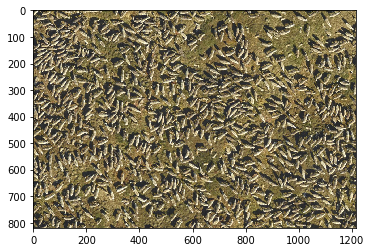

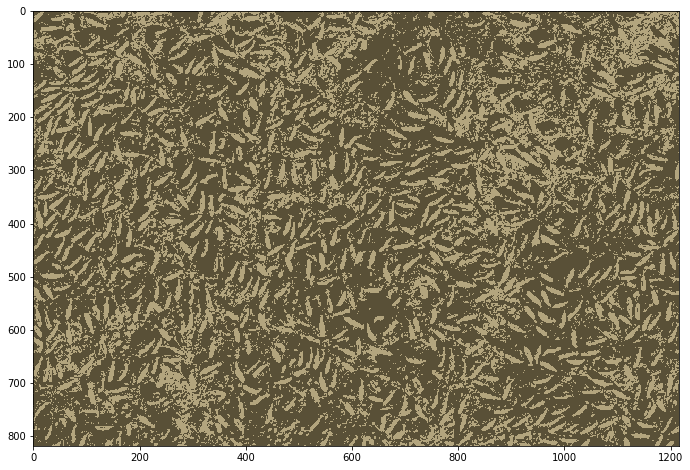

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# clustering https://docs.opencv.org/3.1.0/d1/d5c/tutorial_py_kmeans_opencv.html
img = cv2.imread("datasets/images/caribou.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
Z = np.float32(img.reshape((-1,3))) # list of just colors
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#TODO: write some code here that will produce a picture much closer to expected


K = 2
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
center = np.uint8(center)
res = center[label.flatten()].reshape((img.shape)) # and back to image shape
plt.figure(figsize=(16,8))
plt.imshow(res)
plt.show()